In [134]:
import warnings
warnings.filterwarnings("ignore")

# Imports

In [135]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Скачиваем данные

In [136]:
df = pd.read_csv('./german_credit_data_train.csv')
y = (df.Risk == 'good') * 1
df.drop('Risk', axis=1, inplace=True)

In [137]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [138]:
y[:5]

0    1
1    0
2    1
3    1
4    0
Name: Risk, dtype: int32

# Краткий анализ имеющихся данных

###### Баланс классов

In [139]:
y.value_counts(normalize=True)

1    0.702222
0    0.297778
Name: Risk, dtype: float64

###### Проверка пропусков

In [140]:
pd.isnull(df).sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     163
Checking account    356
Credit amount         0
Duration              0
Purpose               0
dtype: int64

###### Проверка типов данных

In [141]:
df.dtypes

Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
dtype: object

###### Проверка количества уникальных

In [142]:
df.nunique()

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       837
Duration             33
Purpose               8
dtype: int64

###### Просмотр некоторых фичей

In [143]:
df['Housing'].value_counts(normalize=True)

own     0.712222
rent    0.175556
free    0.112222
Name: Housing, dtype: float64

# Предобработка данных

###### Map sex

In [144]:
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

###### Заполнение пропусков

In [145]:
df['Saving accounts'] = df['Saving accounts'].fillna('Unknown')
df['Checking account'] = df['Checking account'].fillna('Unknown')

###### Проверка заполнения пропусков

In [146]:
pd.isnull(df).sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64

### Кодирование Категориальных признаков

###### Выбор категориальных и количественных признаков

In [147]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,1,2,own,Unknown,little,1169,6,radio/TV
1,22,0,2,own,little,moderate,5951,48,radio/TV
2,49,1,1,own,little,Unknown,2096,12,education
3,45,1,2,free,little,little,7882,42,furniture/equipment
4,53,1,2,free,little,little,4870,24,car


In [148]:
num = ['Sex', 'Age', 'Credit amount', 'Duration']
cat = ['Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']
target = 'Risk'

In [149]:
from category_encoders import OneHotEncoder
ohe = OneHotEncoder(cols=cat)

In [150]:
df = ohe.fit_transform(df)
df

,Age,Sex,Job_1,Job_2,Job_3,Job_4,Housing_1,Housing_2,Housing_3,Saving accounts_1,...,Credit amount,Duration,Purpose_1,Purpose_2,Purpose_3,Purpose_4,Purpose_5,Purpose_6,Purpose_7,Purpose_8
0,67,1,1,0,0,0,1,0,0,1,...,1169,6,1,0,0,0,0,0,0,0
1,22,0,1,0,0,0,1,0,0,0,...,5951,48,1,0,0,0,0,0,0,0
2,49,1,0,1,0,0,1,0,0,0,...,2096,12,0,1,0,0,0,0,0,0
3,45,1,1,0,0,0,0,1,0,0,...,7882,42,0,0,1,0,0,0,0,0
4,53,1,1,0,0,0,0,1,0,0,...,4870,24,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,31,1,0,0,1,0,1,0,0,1,...,8947,36,0,0,0,1,0,0,0,0
896,28,0,0,0,1,0,0,0,1,0,...,2606,21,1,0,0,0,0,0,0,0
897,35,0,1,0,0,0,1,0,0,0,...,1592,12,0,0,1,0,0,0,0,0
898,33,0,0,1,0,0,0,0,1,1,...,2186,15,0,0,1,0,0,0,0,0


# Генерация признаков

###### Полиномиальные признаки

In [151]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)

In [152]:
df_p = pf.fit_transform(df)

###### Полет фантазий

In [153]:
df['feature_1'] = ... # Какая-то новая фича, которая повысит качество модели
df['feature_2'] = ... # Какая-то новая фича, которая повысит качество модели
...
df['feature_n'] = ... # Какая-то новая фича, которая повысит качество модели

In [154]:
from sklearn.model_selection import train_test_split

Xtr, Xval, ytr, yval = train_test_split(df, y, test_size=0.10, random_state=42)

In [155]:
Xtr

,Age,Sex,Job_1,Job_2,Job_3,Job_4,Housing_1,Housing_2,Housing_3,Saving accounts_1,...,Purpose_2,Purpose_3,Purpose_4,Purpose_5,Purpose_6,Purpose_7,Purpose_8,feature_1,feature_2,feature_n
346,23,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,Ellipsis,Ellipsis,Ellipsis
545,43,1,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,Ellipsis,Ellipsis,Ellipsis
800,54,1,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,Ellipsis,Ellipsis,Ellipsis
809,26,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,Ellipsis,Ellipsis,Ellipsis
778,38,1,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,Ellipsis,Ellipsis,Ellipsis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,39,1,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,Ellipsis,Ellipsis,Ellipsis
270,32,1,1,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,Ellipsis,Ellipsis,Ellipsis
860,27,1,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,Ellipsis,Ellipsis,Ellipsis
435,25,1,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,Ellipsis,Ellipsis,Ellipsis


# Выбор модели и оптимизация

###### Decision Tree Classifier

In [156]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [157]:
dtc = DecisionTreeClassifier(min_samples_split=4)
params = {'min_samples_split': [3,4,5,6,7,8,9,10]}
cv = StratifiedKFold(shuffle=True, n_splits=5)

In [158]:
GS_dtc = GridSearchCV(estimator=dtc, param_grid=params, cv=cv, scoring='roc_auc')

In [159]:
GS_dtc.fit(X=Xtr, y=ytr)

TypeError: float() argument must be a string or a number, not 'ellipsis'

In [160]:
GS_dtc.best_score_

nan

###### Logistic Regression

In [161]:
from sklearn.linear_model import LogisticRegression

In [162]:
model = LogisticRegression()
params = {'C': np.logspace(-7, 0, 20)}
GS_LR = GridSearchCV(estimator=model, param_grid=params, cv=cv, scoring='roc_auc')

In [163]:
GS_LR.fit(X=Xtr, y=ytr)

TypeError: float() argument must be a string or a number, not 'ellipsis'

In [164]:
# Лучшая модель при параметре "C"
GS_LR.best_params_

{'C': 1e-07}

In [165]:
# Лучший показатель ROC_AUC
GS_LR.best_score_

nan

In [166]:
GS_LR.best_estimator_.coef_

AttributeError: 'LogisticRegression' object has no attribute 'coef_'

In [167]:
means = GS_LR.cv_results_['mean_test_score']
stds = GS_LR.cv_results_['std_test_score']
error = 1.95 * stds
plt.plot(params['C'], means, color = 'blue')
plt.plot(params['C'], means - error, color = 'green')
plt.plot(params['C'], means + error, color = 'green')
plt.fill_between(params['C'], means - error, means + error, color = 'green')
plt.xlabel('C')
plt.ylabel('Average quality')
plt.title('Average quality for LR model')
plt.show()

AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

###### kNN

In [168]:
from sklearn.neighbors import KNeighborsClassifier

In [169]:
model = KNeighborsClassifier()
params = {'n_neighbors': range(1,100, 5)}
cv = StratifiedKFold(shuffle=True, n_splits=5)
GS_kNN = GridSearchCV(estimator=model, param_grid=params, cv=cv, scoring='roc_auc')

In [170]:
GS_kNN.fit(X=Xtr, y=ytr)

TypeError: float() argument must be a string or a number, not 'ellipsis'

In [171]:
# Лучший параметр 'n_neighbors'
GS_kNN.best_params_

{'n_neighbors': 1}

In [172]:
# Лучший показатель ROC_AUC
GS_kNN.best_score_

nan

In [173]:
means = GS_kNN.cv_results_['mean_test_score']
stds = GS_kNN.cv_results_['std_test_score']
error = 1.95 * stds
plt.plot(params['n_neighbors'], means, color = 'blue')
plt.plot(params['n_neighbors'], means - error, color = 'green')
plt.plot(params['n_neighbors'], means + error, color = 'green')
plt.fill_between(params['n_neighbors'], means - error, means + error, color = 'green')
plt.xlabel('n_neighbors')
plt.ylabel('Average quality')
plt.title('Average quality for kNN model')
plt.show()

AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

# Нормировка данных

Нормируем данные и проверяем качество

In [174]:
from sklearn.preprocessing import StandardScaler

In [175]:
ss = StandardScaler(with_mean=True, with_std=True)

X_scaled = ss.fit_transform(Xtr)

X_val_scaled = ss.transform(Xval)

TypeError: float() argument must be a string or a number, not 'ellipsis'

# Модели на нормированных данных

###### Decision Tree Classifier

In [40]:
dtc = DecisionTreeClassifier()
params = {'min_samples_split': [3,4,5,6,7,8,9,10]}
cv = StratifiedKFold(shuffle=True, n_splits=5)

In [41]:
GS_dtc = GridSearchCV(estimator=dtc, param_grid=params, cv=cv, scoring='roc_auc')

In [119]:
# Заменяем df[train_cols] на X_scaled
GS_dtc.fit(X=X_scaled, y=ytr)

NameError: name 'X_scaled' is not defined

In [43]:
# Алгоритмы на деревьях не чуствительны к масштабированию данных, поэтому скор не изменился
GS_dtc.best_score_

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

Скор не большой, так как мы перебрали не все параметры

Попробуйте факультативно попробовать поварьировать другие параметры и добиться лучшего ROC_AUC

###### Logistic Regression

In [44]:
cv = StratifiedKFold(shuffle=True, n_splits=10)

In [45]:
model = LogisticRegression()
params = {'C': np.logspace(-7, 0, 20)}
GS_LR = GridSearchCV(estimator=model, param_grid=params, cv=cv, scoring='roc_auc')

NameError: name 'LogisticRegression' is not defined

In [46]:
GS_LR.fit(X=X_scaled, y=ytr)

NameError: name 'GS_LR' is not defined

In [47]:
# Лучший параметр "C" сильно уменьшился,
# Так как мы нормировали данные и теперь надо меньше штрафовать большие веса
GS_LR.best_params_

NameError: name 'GS_LR' is not defined

In [48]:
GS_LR.best_score_

NameError: name 'GS_LR' is not defined

###### kNN

In [49]:
cv = StratifiedKFold(shuffle=True, n_splits=10)

In [50]:
model = KNeighborsClassifier()
params = {'n_neighbors': range(1,100, 5)}
cv = StratifiedKFold(shuffle=True, n_splits=5)
GS_kNN = GridSearchCV(estimator=model, param_grid=params, cv=cv, scoring='roc_auc')

In [51]:
GS_kNN.fit(X_scaled, ytr)

NameError: name 'X_scaled' is not defined

In [52]:
# Лучший параметр 'n_neighbors'
GS_kNN.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [53]:
# Показатель метрики ROC_AUC сильно увеличился после нормировки (с 0.59 до 0.74),
# Так как метрические алгоритмы очень чуствительны к ненормированным данным.
GS_kNN.best_score_

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

In [54]:
means = GS_kNN.cv_results_['mean_test_score']
stds = GS_kNN.cv_results_['std_test_score']
error = 1.95 * stds
plt.plot(params['n_neighbors'], means, color = 'blue')
plt.plot(params['n_neighbors'], means - error, color = 'green')
plt.plot(params['n_neighbors'], means + error, color = 'green')
plt.fill_between(params['n_neighbors'], means - error, means + error, color = 'green')
plt.xlabel('n_neighbors')
plt.ylabel('Average quality')
plt.title('Average quality for kNN model')
plt.show()

AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

In [55]:
kNN_model = GS_kNN.best_estimator_ # Лучший ROC_AUC при гиперпараметре
LR_model = GS_LR.best_estimator_ # Лучший ROC_AUC при гиперпараметре
DT_model = GS_dtc.best_estimator_ # Лучший ROC_AUC при гиперпараметре

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

NameError: name 'kNN_model' is not defined

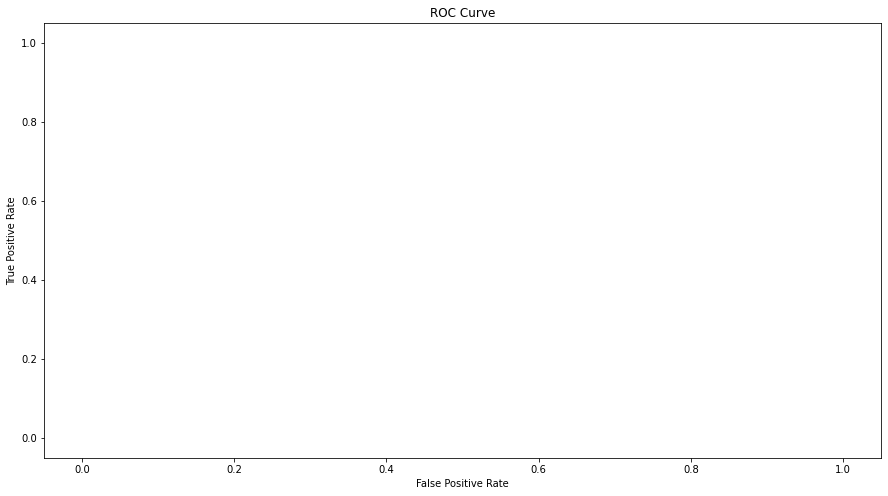

In [56]:
from sklearn.metrics import roc_curve


fig = plt.figure(figsize=(15,8))

ax = fig.add_subplot(1,1,1)
ax.set_xlim([-0.05,1.05])
ax.set_ylim([-0.05,1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve')
    
for model in [kNN_model, LR_model, DT_model]:
    
    scores = model.predict_proba(X_val_scaled)[:, 1]
    
    tpr, fpr, _ = roc_curve(yval, scores)
    
    ax.plot(tpr,fpr,label=model.__class__.__name__)

ax.legend(loc='lower right')
                                          
plt.show()

# Blending

Подробнее про ансамбли хорошо объясняется здесь:

https://dyakonov.org/2017/03/10/cтекинг-stacking-и-блендинг-blending/

In [57]:
# Библиотека для блендинга
from sklearn.ensemble import VotingClassifier

###### Выбираем наши лучшие модели (модели при лучших параметрах)

In [58]:
kNN_model = GS_kNN.best_estimator_ # Лучший ROC_AUC при гиперпараметре
LR_model = GS_LR.best_estimator_ # Лучший ROC_AUC при гиперпараметре

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [59]:
kNN_model = KNeighborsClassifier(n_neighbors=71)
LR_model = LogisticRegression(C=0.0026366508987303553)

NameError: name 'LogisticRegression' is not defined

In [60]:
# Передаем в VotingClassifier наши модели для ансамбля
vc = VotingClassifier([('kNN', kNN_model), ('LR', LR_model)], voting='soft')

NameError: name 'LR_model' is not defined

In [61]:
cv = StratifiedKFold(shuffle=True, n_splits=10)

In [62]:
# Запускаем поиск лучших параметров alpha_1, alpha_2 на кроссвалидации
grid = GridSearchCV(estimator=vc,
                    param_grid={'weights': [[i, 1 - i] for i in np.arange(0,1.1,0.1)]},
                    cv=cv,
                    scoring='roc_auc')
grid.fit(X_scaled, ytr)

NameError: name 'vc' is not defined

In [63]:
# Напомним
print("Качество алгоритма kNN =", GS_kNN.best_score_)
print("Качество алгоритма LogReg =", GS_LR.best_score_)
print("Качество алгоритма ансамбля kNN и LogReg =", grid.best_score_)

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

# Pipeline

In [64]:
X = pd.read_csv('./german_credit_data_train.csv')
y = (X.Risk == 'good') * 1
X.drop('Risk', axis=1, inplace=True)

In [65]:
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator

In [66]:
class FeauresTransform(BaseEstimator):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, df):
        df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})
        df['Saving accounts'] = df['Saving accounts'].fillna('Unknown')
        df['Checking account'] = df['Checking account'].fillna('Unknown')
        return df

In [67]:
vc = VotingClassifier([('kNN', KNeighborsClassifier(**GS_kNN.best_params_)),
                       ('LR', LogisticRegression(**GS_LR.best_params_))], voting='soft', weights = [0.1, 0.9])

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [68]:
pipe = Pipeline([('features', FeauresTransform()),
                 ('cats', OneHotEncoder(cols=cat)),
                 ('scaler', StandardScaler()),
                 ('best_model', vc)
                ])

NameError: name 'vc' is not defined

In [69]:
a_p = pipe.fit_transform(X, y)
a_p

NameError: name 'pipe' is not defined

### Готовим предсказания на отправку

In [70]:
X_test = pd.read_csv('./german_credit_data_test.csv')
X_test.drop('Risk', axis=1, inplace=True)
X_test

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,43,male,2,rent,little,little,2625,16,car
1,44,male,2,own,NaN,NaN,3485,20,car
2,42,male,2,free,NaN,NaN,10477,36,car
3,40,male,2,rent,NaN,NaN,1386,15,radio/TV
4,36,male,3,own,little,NaN,1278,24,radio/TV
...,...,...,...,...,...,...,...,...,...
95,31,female,1,own,little,NaN,1736,12,furniture/equipment
96,40,male,3,own,little,little,3857,30,car
97,38,male,2,own,little,NaN,804,12,radio/TV
98,23,male,2,free,little,little,1845,45,radio/TV


In [71]:
preds = pipe.predict_proba(X_test)[:, 1]

NameError: name 'pipe' is not defined

In [72]:
X_test['Risk'] = preds

NameError: name 'preds' is not defined

In [73]:
X_test

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,43,male,2,rent,little,little,2625,16,car
1,44,male,2,own,NaN,NaN,3485,20,car
2,42,male,2,free,NaN,NaN,10477,36,car
3,40,male,2,rent,NaN,NaN,1386,15,radio/TV
4,36,male,3,own,little,NaN,1278,24,radio/TV
...,...,...,...,...,...,...,...,...,...
95,31,female,1,own,little,NaN,1736,12,furniture/equipment
96,40,male,3,own,little,little,3857,30,car
97,38,male,2,own,little,NaN,804,12,radio/TV
98,23,male,2,free,little,little,1845,45,radio/TV


In [74]:
X_test[['Risk']].to_csv('./submition.csv', index=False)

KeyError: "None of [Index(['Risk'], dtype='object')] are in the [columns]"

### Посмотрим финальный score

In [75]:
from sklearn.metrics import roc_auc_score

In [76]:
answers = pd.read_csv('./answers.csv', index_col=0)

In [77]:
answers.Risk = answers.Risk.map({'good': 1, 'bad': 0})

In [78]:
roc_auc_score(y_true=answers.Risk.values, y_score=preds)

NameError: name 'preds' is not defined

_____

_____

_____

_____

_____

_____

_____